In [ ]:
    1. Data
        The project should use a real-world dataset and include a reference to thesource in the report - DONE
    2. Importing
        Import data from a flat file (.csv, .xls, xlsx, .txt, etc.) - DONE
        Retrieve data using online SQL, APIs, or web scraping - DONE - kaggle pull and FIFA ranking scrape
    3. Preparation
        Create pandas DataFrame - DONE
        Sorting, indexing, grouping - NO SORT NO INDEX READ INTO THESE
        Drop duplicates, replace missing values - NO DROP DUP NO REPLACE MISS
        Merge DataFrames - DONE
    4. Analysis
        Conditional statements, looping, groupby - NO COND OR LOOP DO THIS IN SQUAD FUNCTION, YES GROUPING
        Define a custom function to create reusable code - TO DO FOR MATCH FUNCTIONS
        Use NumPy functions - NO NUMPY
        Dictionary or Lists - LISTS USED FOR WC TEAMS
    5. Visualisation
        Generate at least two charts using Matplotlib or Seaborn - YES DESCRIBED BELOW, DO SOME ADD ANALYSIS ONES AT BEGINNING IE DIST (WC TEAMS AND NOT) ETC
    6. Insights
        Derive five valuable insights from the analysis - BEST TEAMS ARE HIGH VAL+LUES RATINGS STRENGTH ETC
        Justify your insights with reference to the charts or analysis _ USE GRAPHS
    7. Machine Learning
        Describe what kind of prediction you could perform in future using machine learning and/or deep learning. - INCLUDE MORE DTA IE OLD WORLD CUP EVEN CLUB MATCHES
        Would you use classification or regression methods? - NO TO LOOK INTO
    

In [ ]:
## plan

Take each player:
    Group by Position:
        Weighted forumla that is normalised 70-100 between:
            World Cup Value - player value (average of four years)
            Current transfermarkt summised value
            Current fifa rating
            Potential Rating
        Get each players rating.
    Group by Nationality
        Take the best X players for each position (ie: 3 goalkeeper etc)
        Build a 25 man squad (look for players not included from lower clubs that have been ommited (added these back in seperatley) maybe come back and do fulls scope of players)
    Create a squad rating
        DEF rating
        MID rating
        ATT rating
        FIFA world ranking - web scrape
    Create function that will play each against eachother
        Play group stages loaded in
        Play round of 16
        Play round of 8
        Play semis
        Play final
            Form Increased if you win
                For each match:
                    Team rating will increase/remain/decrease per result (will need recalculated):
                    Win +2 per rating
                    Draw 0 per rating
                    Loss -1 per rating
Visuals of best team on average with:
    Team Averages:
        Strength
        Skills 
        Etc
    Best and Worst Team XI's: 
        (Copy FYP) - use the image links
        Overall
        Potential etc
    Best Players not included in the 25 man squad
    Best Players in last couple World Cups
    Compare my rankins to FIFA ranks
    

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

import random
from scipy.stats import norm

### Loading Data in from Kaggle API

f51999f5f297523ab16349d4112bd4ff

In [93]:
od.download("https://www.kaggle.com/datasets/davidcariboo/player-scores")

Skipping, found downloaded files in "./player-scores" (use force=True to force download)


### Reading in the Kaggle tables for Transfer Markt

In [2]:
valuations = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/player_valuations.csv')
players = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/players.csv')
competitions = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/competitions.csv')
clubs = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/clubs.csv')

In [3]:
players= pd.read_csv(players)
valuations= pd.read_csv(valuations)
competitions= pd.read_csv(competitions)
clubs= pd.read_csv(clubs)

In [4]:
#current players only
still_playing = players['last_season'].isin([2018,2019,2020,2021, 2022])
players = players[still_playing]
players.head()

,player_id,pretty_name,club_id,club_pretty_name,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,...,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,agent_name,contract_expiration_date,domestic_competition_id,club_name,image_url,last_season,url
9645,96472,Ralf Seuntjens,1426,Vvv Venlo,1426,Netherlands,Netherlands,1989-04-17,Attack,Centre-Forward,...,194,495000.0,675000.0,Sportconsult Nederland,2024-01-31,NL1,vvv-venlo,NaN,2018,https://www.transfermarkt.co.uk/ralf-seuntjens...
9646,234807,Martin Samuelsen,1426,Vvv Venlo,1426,Norway,Norway,1997-04-17,Attack,Left Winger,...,189,450000.0,720000.0,Jim Solbakken,2022-12-31,NL1,vvv-venlo,NaN,2018,https://www.transfermarkt.co.uk/martin-samuels...
9647,118292,Julian Michel,498,Ksc Lokeren,498,France,France,1992-02-19,Midfield,Central Midfield,...,180,NaN,1350000.0,Eleven Management,NaN,BE1,ksc-lokeren,NaN,2018,https://www.transfermarkt.co.uk/julian-michel/...
9648,12974,Killian Overmeire,498,Ksc Lokeren,498,Belgium,Belgium,1985-12-06,Midfield,Defensive Midfield,...,188,NaN,1800000.0,PROFI-MANAGEMENT,NaN,BE1,ksc-lokeren,NaN,2018,https://www.transfermarkt.co.uk/killian-overme...
9649,70170,Lukas Marecek,498,Ksc Lokeren,498,Czech Republic,CSSR,1990-04-17,Midfield,Defensive Midfield,...,182,180000.0,1350000.0,NaN,2022-06-30,BE1,ksc-lokeren,NaN,2018,https://www.transfermarkt.co.uk/lukas-marecek/...


In [5]:
valuations.head()

,date,datetime,dateweek,player_id,current_club_id,market_value,player_club_domestic_competition_id
0,2013-07-22,2013-07-22,2013-07-22,254016,855,90000,FR1
1,2014-01-14,2014-01-14,2014-01-13,254016,855,90000,FR1
2,2008-08-25,2008-08-25,2008-08-25,51053,23,90000,L1
3,2011-05-30,2011-05-30,2011-05-30,51053,23,90000,L1
4,2011-08-26,2011-08-26,2011-08-22,51053,23,225000,L1


In [6]:
joined = pd.merge(left = players, right = valuations, how = 'inner', on = 'player_id' )
#firsttierplayersonly (revise later if no players for country)


In [7]:
joined = pd.merge(left = joined, right = clubs, how = 'inner', on = 'club_id' )
joined = pd.merge(left = joined, right = competitions, how = 'inner', left_on='player_club_domestic_competition_id', right_on='competition_id' )

In [8]:
#first_tier = joined['sub_type'] == 'first_tier'
toptierplayers = joined

In [9]:
toptierplayers['date'] = pd.to_datetime(toptierplayers['date'], errors='coerce')

In [10]:
toptierplayers['Year']= toptierplayers['date'].dt.year
grouped_multiple = toptierplayers.groupby(['player_id', 'Year']).agg({'market_value': ['mean']})
grouped_multiple.columns = ['market_value_mean']
grouped_multiple['market_value_mean']= grouped_multiple['market_value_mean'].astype(int)
players_avg_value_per_year = grouped_multiple.reset_index()
players_avg_value_per_year.head()

,player_id,Year,market_value_mean
0,532,2004,8550000
1,532,2005,9900000
2,532,2006,10125000
3,532,2007,9675000
4,532,2008,6900000


In [11]:
list=[x for x in range(2003, 2022+1)]
WorldCupList = {'World Cup': ['2006','2006','2006','2006', '2010', '2010','2010','2010','2014','2014','2014','2014','2018','2018','2018','2018','2022','2022','2022','2022'], 'Year': list}
WorldCupYears = pd.DataFrame(WorldCupList)  

In [12]:
players_avg_value_per_wc = pd.merge(players_avg_value_per_year, WorldCupYears, left_on='Year', right_on='Year')
players_avg_value_per_wc = players_avg_value_per_wc.groupby(['player_id', 'World Cup']).agg({'market_value_mean': ['mean', 'min', 'max']})
players_avg_value_per_wc.columns = ['market_value_mean', 'market_value_min', 'market_value_max']
players_avg_value_per_wc['market_value_mean']= players_avg_value_per_wc['market_value_mean'].astype(int)
players_avg_value_per_wc = players_avg_value_per_wc.reset_index()

In [13]:
players_avg_value_per_wc = players_avg_value_per_wc.groupby(['player_id', 'World Cup']).agg({'market_value_mean': ['mean', 'min', 'max']})
players_avg_value_per_wc.columns = ['market_value_mean', 'market_value_min', 'market_value_max']
players_avg_value_per_wc = players_avg_value_per_wc.reset_index()

In [14]:
players_avg_value_per_wc

,player_id,World Cup,market_value_mean,market_value_min,market_value_max
0,532,2006,9525000.0,9525000,9525000
1,532,2010,8268750.0,8268750,8268750
2,532,2014,3675416.0,3675416,3675416
3,532,2018,787500.0,787500,787500
4,532,2022,405000.0,405000,405000
...,...,...,...,...,...
36691,1048097,2022,50000.0,50000,50000
36692,1048954,2022,50000.0,50000,50000
36693,1050249,2022,75000.0,75000,75000
36694,1050852,2022,50000.0,50000,50000


In [16]:
toptierplayers_per_wc = pd.merge(toptierplayers,players_avg_value_per_wc,on = 'player_id')

In [17]:
toptierplayers_per_wc.columns

Index(['player_id', 'pretty_name_x', 'club_id', 'club_pretty_name',
       'current_club_id_x', 'country_of_citizenship', 'country_of_birth',
       'date_of_birth', 'position', 'sub_position', 'name_x', 'foot',
       'height_in_cm', 'market_value_in_gbp', 'highest_market_value_in_gbp',
       'agent_name', 'contract_expiration_date', 'domestic_competition_id_x',
       'club_name', 'image_url', 'last_season', 'url_x', 'date', 'datetime',
       'dateweek', 'current_club_id_y', 'market_value',
       'player_club_domestic_competition_id', 'name_y', 'pretty_name_y',
       'domestic_competition_id_y', 'total_market_value', 'squad_size',
       'average_age', 'foreigners_number', 'foreigners_percentage',
       'national_team_players', 'stadium_name', 'stadium_seats',
       'net_transfer_record', 'coach_name', 'url_y', 'competition_id',
       'pretty_name', 'type', 'sub_type', 'country_id', 'country_name',
       'country_latitude', 'country_longitude', 'domestic_league_code', 'name',

In [18]:
WC_2022_teams = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'Iran', 'Korea, South', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'United States', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

In [19]:
TopTier_2022_WC_Eligble_Players = toptierplayers_per_wc[toptierplayers_per_wc.country_of_citizenship.isin(WC_2022_teams)]
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players[TopTier_2022_WC_Eligble_Players["World Cup"]== "2022"]

In [20]:
print(TopTier_2022_WC_Eligble_Players["country_of_citizenship"].unique())

['Netherlands' 'Germany' 'England' 'Morocco' 'Belgium' 'Switzerland'
 'Iran' 'Croatia' 'United States' 'Portugal' 'France' 'Serbia' 'Denmark'
 'Ghana' 'Ecuador' 'Australia' 'Spain' 'Senegal' 'Japan' 'Wales' 'Brazil'
 'Mexico' 'Argentina' 'Poland' 'Tunisia' 'Saudi Arabia' 'Costa Rica'
 'Cameroon' 'Canada' 'Qatar' 'Uruguay' 'Korea, South']


In [21]:
TopTier_2022_WC_Eligble_Players =TopTier_2022_WC_Eligble_Players[['World Cup','player_id','pretty_name_x','country_of_citizenship','position','sub_position','date_of_birth','name','market_value_mean','market_value_min','market_value_max']]

In [22]:
TopTier_2022_WC_Eligble_Players.head(5)

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
3,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
7,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
11,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
15,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
19,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125


In [23]:
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players.drop_duplicates()

In [24]:
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players.sort_values(by='market_value_mean',ascending=False)

In [73]:
TopTier_2022_WC_Eligble_Players.head(5)

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
633985,2022,342229,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000,175000000
150608,2022,132098,Harry Kane,England,Attack,Centre-Forward,1993-07-28,premier-league,118333333.0,118333333,118333333
634231,2022,68290,Neymar,Brazil,Attack,Left Winger,1992-02-05,ligue-1,118250000.0,118250000,118250000
137350,2022,88755,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666,109791666
161985,2022,134425,Raheem Sterling,England,Attack,Left Winger,1994-12-08,premier-league,108416666.0,108416666,108416666


In [26]:
TopTier_2022_WC_Eligble_Players[TopTier_2022_WC_Eligble_Players['player_id'].isin([50202])]

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
211517,2022,50202,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,65358333.0,65358333,65358333


## EA Sports FIFA Ratings

In [151]:
od.download("https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset")

Skipping, found downloaded files in "./fifa-23-players-dataset" (use force=True to force download)


In [27]:
fifa23data = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/fifa-23-players-dataset/Fifa 23 Players Data.csv')
fifa23= pd.read_csv(fifa23data)

In [28]:
print(fifa23.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [29]:
fifa23 = fifa23[['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'TotalStats', 
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Club Jersey Number',
       'Skill Moves','International Reputation', 
        'National Team Name','National Team Image Link', 'National Team Position',
       'National Team Jersey Number','Finishing','Short Passing', 'Sprint Speed', 'Stamina', 'Strength', 'Penalties']]

In [30]:
fifa23.head(20)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,90,91,76,70,68,75
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,France,https://cdn.sofifa.net/flags/fr.png,ST,19,92,89,80,82,82,84
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,94,84,75,76,87,90
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,85,93,73,88,74,83
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,France,https://cdn.sofifa.net/flags/fr.png,ST,10,93,85,97,87,76,80
5,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,175,...,-,-,-,-,93,84,91,87,75,86
6,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,199,...,Belgium,https://cdn.sofifa.net/flags/be.png,GK,1,14,33,52,38,70,27
7,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,193,...,Germany,https://cdn.sofifa.net/flags/de.png,GK,1,13,60,60,43,80,47
8,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,187,...,Portugal,https://cdn.sofifa.net/flags/pt.png,ST,7,93,80,83,76,77,90
9,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,193,...,Netherlands,https://cdn.sofifa.net/flags/nl.png,CB,4,52,79,91,74,93,62


In [31]:
fifa23['Full Name']= fifa23['Full Name'].astype(str)
cols = ['Full Name']
fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [246]:
fifa23transfermarkt2022WC = pd.merge(left = fifa23, right = TopTier_2022_WC_Eligble_Players, how = 'left', left_on='Full Name', right_on='pretty_name_x' )

# Creating a Weighted Rating

In [247]:
#### Top 50 Players Per Country
def top_players(df):
  # Sort the data by overall in descending order
  df = df.sort_values(by="Overall", ascending=False)
  # Select the top 50 players
  df = df.head(50)
  return df

In [248]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.groupby("country_of_citizenship").apply(top_players)

In [249]:
fifa23transfermarkt2022WC=fifa23transfermarkt2022WC.reset_index(level=0, drop=True)

In [250]:
unique_positions = fifa23transfermarkt2022WC['position'].unique()

In [251]:
Positions = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['position'] == value1)]
    ## 28 Man Squad
    Positions[value1] = value_df

#sets a dataframe for each variation of country and each position

for key, value in Positions.items():
  # Create a DataFrame with the same name as the key
  globals()[key] = pd.DataFrame(value)

In [253]:
Attack=Attack[["Full Name","player_id","Overall","Potential","market_value_mean","Wage(in Euro)"]]
Midfield=Midfield[["Full Name","player_id","Overall","Potential","market_value_mean","Wage(in Euro)"]]
Defence=Defence[["Full Name","player_id","Overall","Potential","market_value_mean","Wage(in Euro)"]]

In [254]:
Attack[['player_id', "market_value_mean"]] = Attack[['player_id', "market_value_mean"]].astype(int)
Attack[['player_id', "market_value_mean"]] = Attack[['player_id', "market_value_mean"]].astype(int)
Attack[['player_id', "market_value_mean"]] = Attack[['player_id', "market_value_mean"]].astype(int)

In [255]:
Attack['normalised_rating'] = (0.6 * Attack['Overall'] + 0.2 * Attack["Potential"] + 0.1 * Attack['market_value_mean'] + 0.1 * Attack['Wage(in Euro)']) / (0.6 + 0.2 + 0.1 + 0.1)

# Normalize the values between 70 and 100
Attack['normalised_rating'] = (Attack['normalised_rating'] - Attack['normalised_rating'].min()) / (Attack['normalised_rating'].max() - Attack['normalised_rating'].min()) * 30 + 70

In [256]:
Attack = Attack[["player_id","normalised_rating"]]

In [257]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.merge(Attack, on="player_id", suffixes=("_fifa23transfermarkt2022WC", "_Attack"))

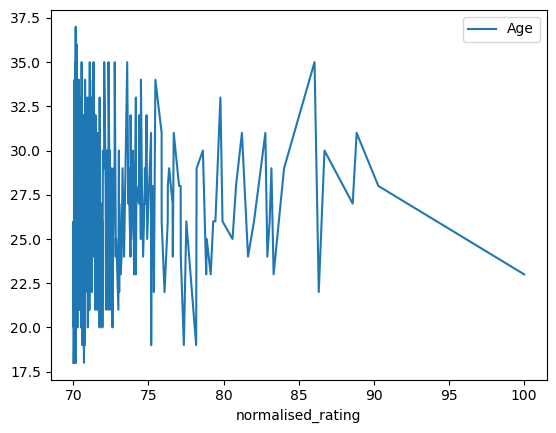

In [258]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.sort_values(by="normalised_rating", ascending=False)

# Plot the normalised_rating for each player
fifa23transfermarkt2022WC.plot(x="normalised_rating",y='Age', kind="line")

# Show the plot
plt.show()

In [244]:
fifa23transfermarkt2022WC

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max,normalised_rating
138,Kylian Mbappe,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000.0,175000000.0,100.000000
121,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,188,...,Harry Kane,England,Attack,Centre-Forward,1993-07-28,premier-league,118333333.0,118333333.0,118333333.0,90.297363
31,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666.0,109791666.0,88.853416
122,Raheem Sterling,86,86,72500000,"LW,RW",LW,England,https://cdn.sofifa.net/players/202/652/23_60.png,27,170,...,Raheem Sterling,England,Attack,Left Winger,1994-12-08,premier-league,108416666.0,108416666.0,108416666.0,88.591391
326,Sadio Mane,89,89,99500000,"LM,CF",LM,Senegal,https://cdn.sofifa.net/players/208/722/23_60.png,30,174,...,Sadio Mane,Senegal,Attack,Left Winger,1992-04-10,bundesliga,97499999.0,97499999.0,97499999.0,86.713319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Mizuki Arai,67,70,1300000,"CAM,LM,LW",CAM,Japan,https://cdn.sofifa.net/players/270/969/23_60.png,25,170,...,Mizuki Arai,Japan,Attack,Left Winger,1997-04-14,liga-portugal-bwin,144444.0,144444.0,144444.0,70.016695
384,Juan Cruz,66,74,1900000,ST,ST,Argentina,https://cdn.sofifa.net/players/255/453/23_60.png,22,184,...,Juan Cruz,Spain,Attack,Right Winger,2000-04-25,laliga,141666.0,141666.0,141666.0,70.016390
368,Bojan Radulovic,61,68,675000,ST,ST,Serbia,https://cdn.sofifa.net/players/243/831/23_60.png,22,192,...,Bojan Radulovic,Serbia,Attack,Centre-Forward,1999-12-29,premier-league,135000.0,135000.0,135000.0,70.014471
410,Sebastian Tounekti,60,74,575000,LM,CAM,Tunisia,https://cdn.sofifa.net/players/256/383/23_60.png,19,183,...,Sebastian Tounekti,Tunisia,Attack,Left Winger,2002-07-13,eredivisie,112666.0,112666.0,112666.0,70.010646


Add this value back in using playerid

# Preparing custom function for teams to play eachother

In [189]:
print(fifa23transfermarkt2022WC.columns)

Index(['Full Namenormalised_rating', 'Overallnormalised_rating',
       'Potentialnormalised_rating', 'Value(in Euro)normalised_rating',
       'Positions Playednormalised_rating', 'Best Positionnormalised_rating',
       'Nationalitynormalised_rating', 'Image Linknormalised_rating',
       'Agenormalised_rating', 'Height(in cm)normalised_rating',
       ...
       'market_value_mean_fifa23transfermarkt2022WC', 'market_value_min',
       'market_value_max', 'Full Name_Attack', 'player_id', 'Overall_Attack',
       'Potential_Attack', 'market_value_mean_Attack', 'Wage(in Euro)_Attack',
       'normalised_rating_Attack'],
      dtype='object', length=127)


##### Adding GoalKeepers to the Defence Grouping

In [155]:
fifa23transfermarkt2022WC["position"] = fifa23transfermarkt2022WC["position"].replace("Goalkeeper", "Defender")

#### Splitting every country into their own DataFrame

In [156]:
unique_countries = fifa23transfermarkt2022WC['country_of_citizenship'].unique()
unique_positions = fifa23transfermarkt2022WC['position'].unique()

In [157]:
print(unique_countries)
print(unique_positions)

['Argentina' 'Australia' 'Belgium' 'Brazil' 'Cameroon' 'Canada'
 'Costa Rica' 'Croatia' 'Denmark' 'Ecuador' 'England' 'France' 'Germany'
 'Ghana' 'Iran' 'Japan' 'Korea, South' 'Mexico' 'Morocco' 'Netherlands'
 'Poland' 'Portugal' 'Qatar' 'Saudi Arabia' 'Senegal' 'Serbia' 'Spain'
 'Switzerland' 'Tunisia' 'United States' 'Uruguay' 'Wales']
['Attack' 'Defender' 'Midfield']


In [158]:
# creating a dicttionary of each team split into seperate dataframes
WorldCupTeams = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_countries:
  for value2 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['country_of_citizenship'] == value1) & (fifa23transfermarkt2022WC['position'] == value2)]
    ## 28 Man Squad
    value_df = value_df.sort_values('Overall', ascending=False).head(9)
    WorldCupTeams[(value1, value2)] = value_df

#sets a dataframe for each variation of country and each position

for key, value in WorldCupTeams.items():
  # Create a DataFrame with the same name as the key
  globals()["_".join(key)] = pd.DataFrame(value)

In [159]:
Belgium_Attack.head(10)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,88755.0,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666.0,109791666.0
45,Romelu Lukaku,86,86,68000000,ST,ST,Belgium,https://cdn.sofifa.net/players/192/505/23_60.png,29,191,...,96341.0,Romelu Lukaku,Belgium,Attack,Centre-Forward,1993-05-13,serie-a,81750000.0,81750000.0,81750000.0
79,Yannick Carrasco,85,85,54500000,LM,LM,Belgium,https://cdn.sofifa.net/players/208/418/23_60.png,28,181,...,140776.0,Yannick Carrasco,Belgium,Attack,Left Winger,1993-09-04,laliga,30750000.0,30750000.0,30750000.0
95,Dries Mertens,84,84,18000000,"CF,ST,CAM",CF,Belgium,https://cdn.sofifa.net/players/175/943/23_60.png,35,169,...,56416.0,Dries Mertens,Belgium,Attack,Centre-Forward,1987-05-06,super-lig,13654166.0,13654166.0,13654166.0
120,Eden Hazard,84,84,35000000,LW,LW,Belgium,https://cdn.sofifa.net/players/183/277/23_60.png,31,175,...,50202.0,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,65358333.0,65358333.0,65358333.0
431,Hans Vanaken,80,80,20500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/200/155/23_60.png,29,195,...,137576.0,Hans Vanaken,Belgium,Attack,Attacking Midfield,1992-08-24,jupiler-pro-league,14291666.0,14291666.0,14291666.0
439,Thorgan Hazard,80,80,20500000,"LM,CF",LM,Belgium,https://cdn.sofifa.net/players/203/486/23_60.png,29,175,...,102226.0,Thorgan Hazard,Belgium,Attack,Left Winger,1993-03-29,bundesliga,27833333.0,27833333.0,27833333.0
664,Adnan Januzaj,79,79,18500000,"RW,LW",RW,Belgium,https://cdn.sofifa.net/players/208/330/23_60.png,27,186,...,177847.0,Adnan Januzaj,Belgium,Attack,Right Winger,1995-02-05,laliga,10979166.0,10979166.0,10979166.0
669,Leandro Trossard,79,79,18500000,"LM,ST,CAM",LM,Belgium,https://cdn.sofifa.net/players/207/421/23_60.png,27,171,...,144028.0,Leandro Trossard,Belgium,Attack,Left Winger,1994-12-04,premier-league,17833333.0,17833333.0,17833333.0


In [160]:
Brazil_Midfield.head(10)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
7249,Victor Bobsin,67,78,2200000,"CDM,CM",CM,Brazil,https://cdn.sofifa.net/players/263/787/23_60.png,22,185,...,468323.0,Victor Bobsin,Brazil,Midfield,Defensive Midfield,2000-01-12,liga-portugal-bwin,800000.0,800000.0,800000.0


In [161]:
England_Attack.head(15)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
10,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,188,...,132098.0,Harry Kane,England,Attack,Centre-Forward,1993-07-28,premier-league,118333333.0,118333333.0,118333333.0
47,Raheem Sterling,86,86,72500000,"LW,RW",LW,England,https://cdn.sofifa.net/players/202/652/23_60.png,27,170,...,134425.0,Raheem Sterling,England,Attack,Left Winger,1994-12-08,premier-league,108416666.0,108416666.0,108416666.0
81,Jamie Vardy,85,85,23000000,ST,ST,England,https://cdn.sofifa.net/players/208/830/23_60.png,35,179,...,197838.0,Jamie Vardy,England,Attack,Centre-Forward,1987-01-11,premier-league,11958333.0,11958333.0,11958333.0
103,Jack Grealish,84,84,46000000,"LW,LM,CAM",LW,England,https://cdn.sofifa.net/players/206/517/23_60.png,26,180,...,203460.0,Jack Grealish,England,Attack,Left Winger,1995-09-10,premier-league,54237500.0,54237500.0,54237500.0
144,Mason Mount,84,87,57500000,"CAM,RW",CAM,England,https://cdn.sofifa.net/players/233/064/23_60.png,23,180,...,346483.0,Mason Mount,England,Attack,Attacking Midfield,1999-01-10,premier-league,53312500.0,53312500.0,53312500.0
145,Jadon Sancho,84,88,61500000,"LW,RW,LM",CAM,England,https://cdn.sofifa.net/players/233/049/23_60.png,22,180,...,401173.0,Jadon Sancho,England,Attack,Left Winger,2000-03-25,premier-league,95270833.0,95270833.0,95270833.0
199,James Maddison,82,84,38000000,"CAM,RM",CAM,England,https://cdn.sofifa.net/players/220/697/23_60.png,25,175,...,294057.0,James Maddison,England,Attack,Attacking Midfield,1996-11-23,premier-league,51812499.0,51812499.0,51812499.0
222,Tammy Abraham,82,85,42000000,ST,ST,England,https://cdn.sofifa.net/players/231/352/23_60.png,24,195,...,331726.0,Tammy Abraham,England,Attack,Centre-Forward,1997-10-02,serie-a,38645833.0,38645833.0,38645833.0
324,Marcus Rashford,81,85,37000000,"LW,ST",ST,England,https://cdn.sofifa.net/players/231/677/23_60.png,24,186,...,258923.0,Marcus Rashford,England,Attack,Left Winger,1997-10-31,premier-league,75333333.0,75333333.0,75333333.0


In [162]:
def play_game(team1_def_rating,team1_mid_rating,team1_att_rating,team2_def_rating,team2_mid_rating,team2_att_rating):


  team1_rounds = 0
  team2_rounds = 0

  # Check if team 1's attack is greater than team 2's defense
  if (team1_att_rating["Overall"].mean() > team2_def_rating["Overall"].mean()):
    # Calculate the difference in ratings
    rating_diff = team1_att_rating["Overall"].mean() - team2_def_rating["Overall"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team1_rounds += 1

    print(round(team1_att_rating["Overall"].mean(),2) , "Team1 Attack") 
    print(round(team1_mid_rating["Overall"].mean(),2) , "Team1 Midfield")
    print(round(team1_def_rating["Overall"].mean(),2) , "Team1 Defending")
    print(round(team2_def_rating["Overall"].mean(),2) , "Team2 Defending")
    print(round(team2_mid_rating["Overall"].mean(),2) , "Team2 Midfield") 
    print(round(team2_att_rating["Overall"].mean(),2) , "Team2 Attacking") 
    
  # Check if team 2's attack is greater than team 1's defense
  if (team2_att_rating["Overall"].mean() > team1_def_rating["Overall"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_att_rating["Overall"].mean() - team1_def_rating["Overall"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team2_rounds += 1
    
 

   # Check if team 2's midfield is greater than team 1's midfield
  if (team2_mid_rating["Overall"].mean() > team1_mid_rating["Overall"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_mid_rating["Overall"].mean() - team1_mid_rating["Overall"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 2 wins a round
    if rand < probability:
      team2_rounds += 1
    
    
    print(round(team1_att_rating["Overall"].mean(),2) , "Team1 Attack") 
    print(round(team1_mid_rating["Overall"].mean(),2) , "Team1 Midfield")
    print(round(team1_def_rating["Overall"].mean(),2) , "Team1 Defending")
    print(round(team2_def_rating["Overall"].mean(),2) , "Team2 Defending")
    print(round(team2_mid_rating["Overall"].mean(),2) , "Team2 Midfield") 
    print(round(team2_att_rating["Overall"].mean(),2) , "Team2 Attacking") 
   
    

  if team1_rounds > team2_rounds:
    #Adding Form to a team, if they win their Overall goes up by 1, down 1 for a loss and the same for a draw
    
    # Add 2 to the overall of every player in team 1
    team1_def_rating["Overall"] += 1
    team1_mid_rating["Overall"] += 1
    team1_att_rating["Overall"] += 1
    
    # Subtract 1 from the overall of every player in team 2
    team2_def_rating["Overall"] -= 1
    team2_mid_rating["Overall"] -= 1
    team2_att_rating["Overall"] -= 1
    return "Team 1 wins!"
  elif team1_rounds < team2_rounds:
    
    # Add 2 to the overall of every player in team 2
    team2_def_rating["Overall"] += 1
    team2_mid_rating["Overall"] += 1
    team2_att_rating["Overall"] += 1
    
    # Subtract 1 from the overall of every player in team 1
    team1_def_rating["Overall"] -= 1
    team1_mid_rating["Overall"] -= 1
    team1_att_rating["Overall"] -= 1
    return "Team 2 wins!"
  else:
    return "It's a draw!"

    


In [170]:
Belgium_Defender

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
6,Thibaut Courtois,89,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,199,...,108390.0,Thibaut Courtois,Belgium,Defender,NaN,1992-05-11,laliga,60604166.0,60604166.0,60604166.0
114,Koen Casteels,83,85,31500000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/984/23_60.png,30,197,...,108880.0,Koen Casteels,Belgium,Defender,NaN,1992-06-25,bundesliga,11500000.0,11500000.0,11500000.0
259,Toby Alderweireld,81,82,14500000,CB,CB,Belgium,https://cdn.sofifa.net/players/184/087/23_60.png,33,186,...,42710.0,Toby Alderweireld,Belgium,Defender,Centre-Back,1989-03-02,jupiler-pro-league,20041666.0,20041666.0,20041666.0
337,Jan Vertonghen,80,81,7000000,CB,CB,Belgium,https://cdn.sofifa.net/players/172/871/23_60.png,35,191,...,43250.0,Jan Vertonghen,Belgium,Defender,Centre-Back,1987-04-24,jupiler-pro-league,10983333.0,10983333.0,10983333.0
456,Simon Mignolet,79,80,3600000,GK,GK,Belgium,https://cdn.sofifa.net/players/173/426/23_60.png,34,193,...,50219.0,Simon Mignolet,Belgium,Defender,NaN,1988-03-06,jupiler-pro-league,7541666.0,7541666.0,7541666.0
625,Matz Sels,78,80,13000000,GK,GK,Belgium,https://cdn.sofifa.net/players/199/641/23_60.png,30,190,...,127202.0,Matz Sels,Belgium,Defender,NaN,1992-02-26,ligue-1,7041666.0,7041666.0,7041666.0
776,Timothy Castagne,77,80,16000000,"RB,LB",RWB,Belgium,https://cdn.sofifa.net/players/222/501/23_60.png,26,185,...,262226.0,Timothy Castagne,Belgium,Defender,Right-Back,1995-12-05,premier-league,22499999.0,22499999.0,22499999.0
802,Thomas Meunier,77,78,12000000,"RB,RM",RB,Belgium,https://cdn.sofifa.net/players/202/371/23_60.png,30,191,...,100986.0,Thomas Meunier,Belgium,Defender,Right-Back,1991-09-12,bundesliga,17562500.0,17562500.0,17562500.0
908,Wout Faes,76,82,14500000,CB,CB,Belgium,https://cdn.sofifa.net/players/235/036/23_60.png,24,187,...,292808.0,Wout Faes,Belgium,Defender,Centre-Back,1998-04-03,premier-league,6795833.0,6795833.0,6795833.0


In [169]:
England_Defender

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
69,Kyle Walker,86,85,37500000,RB,RB,England,https://cdn.sofifa.net/players/188/377/23_60.png,32,183,...,95424.0,Kyle Walker,England,Defender,Right-Back,1990-05-28,premier-league,33958333.0,33958333.0,33958333.0
137,Reece James,85,88,57000000,"RWB,RB",RWB,England,https://cdn.sofifa.net/players/238/074/23_60.png,22,178,...,472423.0,Reece James,England,Defender,Right-Back,1999-12-08,premier-league,36447916.0,36447916.0,36447916.0
146,Fikayo Tomori,85,90,60500000,CB,CB,England,https://cdn.sofifa.net/players/232/756/23_60.png,24,185,...,303254.0,Fikayo Tomori,England,Defender,Centre-Back,1997-12-19,serie-a,28312499.0,28312499.0,28312499.0
117,Kieran Trippier,85,84,30500000,"RB,RM",RB,England,https://cdn.sofifa.net/players/186/345/23_60.png,31,173,...,95810.0,Kieran Trippier,England,Defender,Right-Back,1990-09-19,premier-league,23416666.0,23416666.0,23416666.0
195,John Stones,84,84,34500000,CB,CB,England,https://cdn.sofifa.net/players/203/574/23_60.png,28,188,...,186590.0,John Stones,England,Defender,Centre-Back,1994-05-28,premier-league,38166666.0,38166666.0,38166666.0
236,Aaron Ramsdale,83,86,34500000,GK,GK,England,https://cdn.sofifa.net/players/233/934/23_60.png,24,191,...,427568.0,Aaron Ramsdale,England,Defender,NaN,1998-05-14,premier-league,16499999.0,16499999.0,16499999.0
243,Ben Chilwell,83,85,37000000,"LWB,LB",LWB,England,https://cdn.sofifa.net/players/229/984/23_60.png,25,180,...,316125.0,Ben Chilwell,England,Defender,Left-Back,1996-12-21,premier-league,42062500.0,42062500.0,42062500.0
246,Jordan Pickford,83,84,26000000,GK,GK,England,https://cdn.sofifa.net/players/204/935/23_60.png,28,185,...,130164.0,Jordan Pickford,England,Defender,NaN,1994-03-07,premier-league,28333333.0,28333333.0,28333333.0
308,Harry Maguire,82,82,24000000,CB,CB,England,https://cdn.sofifa.net/players/203/263/23_60.png,29,194,...,177907.0,Harry Maguire,England,Defender,Centre-Back,1993-03-05,premier-league,48062499.0,48062499.0,48062499.0


In [165]:
play_game(Belgium_Defender,Belgium_Midfield,Belgium_Attack,England_Defender,England_Midfield,England_Attack)

83.11 Team1 Attack
77.33 Team1 Midfield
81.0 Team1 Defending
83.0 Team2 Defending
81.78 Team2 Midfield
84.11 Team2 Attacking
83.11 Team1 Attack
77.33 Team1 Midfield
81.0 Team1 Defending
83.0 Team2 Defending
81.78 Team2 Midfield
84.11 Team2 Attacking


'Team 2 wins!'

In [166]:
play_game(Germany_Defender,Germany_Midfield,Germany_Attack,England_Defender,England_Midfield,England_Attack)

"It's a draw!"

In [167]:
play_game(Germany_Defender,Germany_Midfield,Germany_Attack,England_Defender,England_Midfield,England_Attack)

"It's a draw!"

In [168]:
play_game(Wales_Defender,Wales_Midfield,Wales_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)

74.89 Team1 Attack
66.0 Team1 Midfield
73.89 Team1 Defending
84.56 Team2 Defending
84.0 Team2 Midfield
83.67 Team2 Attacking


'Team 2 wins!'

In [186]:
WorldCupTeams

{('France',
  'Attack'):               Full Name  Overall  Potential  Value(in Euro) Positions Played  \
 4         Kylian Mbappe       91         95       190500000            ST,LW   
 1         Karim Benzema       91         91        64000000            CF,ST   
 56       Kingsley Coman       86         87        80000000               LM   
 61   Christopher Nkunku       86         89        94000000        CF,CAM,ST   
 66          Nabil Fekir       85         85        54500000              CAM   
 127        Moussa Diaby       84         88        61500000         RM,LM,LW   
 109   Wissam Ben Yedder       84         84        35500000               ST   
 192   Antoine Griezmann       83         83        30500000         ST,CF,RW   
 156     Ousmane Dembele       83         86        48000000            RW,LW   
 
     Best Position Nationality  \
 4              ST      France   
 1              CF      France   
 56             LM      France   
 61            CAM      Fran